# Module 1: Data Wrangling with Python
## Sprint 3: Data Visualization with Python
## Part 5: Coursera Course Analysis


## About this Part

Congrats!
You have reached the last Part of this Sprint.
In this Part, you will need to use all that you learned in this and previous Sprints.
As the final assignment of this Sprint, you will analyse the Coursera Course Dataset.
You will have to apply all that you have learned about Data Visualization & Data Analysis to complete this task.
You'll notice that in this project you have fewer explicitly stated requirements.
Our expectation is that you'll use your own judgement how to perform the analysis and how to select the most important avenues of exploration.
You'll have to iteratively raise hypotheses and use your data analysis skills to get answers.

## Objectives for this Part

- Practice working with data from Kaggle.
- Practice performing basic EDA.
- Practice visualizing data with Matplotlib & Seaborn.
- Practice reading data, performing queries and filtering data using Pandas.

## Requirements

- Download the data from [Coursera Course Dataset](https://www.kaggle.com/siddharthm1698/coursera-course-dataset).
- Load the data using Pandas.
- Perform data cleaning.
- Perform exploratory data analysis.
- Provide clear explanations in your notebook. Your explanations should inform the reader what you are trying to achieve, what results did you get, and what these results mean.
- Provide suggestions about how your analysis can be improved.

## Evaluation Criteria

- Adherence to the requirements. How well did you meet the requirements?
- Visualization quality. Did you use charts effectively to visualize patterns in the data? Are your visualizations properly labeled? Did you use colors effectively? Did you adhere to the principle of proportional ink?
- Code quality. Was your code well-structure? Did you use the appropriate levels of abstraction? Did you remove commented out and unused code? Did you adhere to the PEP8?
- Code performance. Did you use the suitable algorithms and data structures to solve the problems?

## Sample Correction Questions

During a correction, you may get asked questions that test your understanding of covered topics.

- What is the difference between continuous and discrete distributions?
- What is a Bernoulli trial?
- What is a Standard Normal Distribution?
- What is a random variable?
- Explain the Bayes's Theorem
- Explain the Simpson's paradox


In [537]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [538]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import *
import warnings
warnings.filterwarnings("ignore")

sns.set_theme(style="ticks")

# Coursera course data

In [539]:
coursera_data = pd.read_csv('/content/drive/MyDrive/coursea_data.csv', index_col = 0)

In [540]:
coursera_data = coursera_data.sort_index()

In [541]:
coursera_data.head(5)

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,IBM Data Science,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,480k
1,Introduction to Data Science,IBM,SPECIALIZATION,4.6,Beginner,310k
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2.5m
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1.5m
4,Google IT Support,Google,PROFESSIONAL CERTIFICATE,4.8,Beginner,350k


The dataset contains information about courses on Coursera.com. It includes:
* the title of the course
* the organization behind each course
* the certificate that can be obtained upon graduation 
* course average rating (1-5 stars)
* course difficulty
* the number of students enrolled

In [542]:
coursera_data.shape

(891, 6)

In [543]:
# check duplicate rows
coursera_data.duplicated().any()

False

In [544]:
# check if any null values exist
coursera_data.isnull().any()

course_title                False
course_organization         False
course_Certificate_type     False
course_rating               False
course_difficulty           False
course_students_enrolled    False
dtype: bool

The dataset does contains information about 890 courses, any of which have any missing or duplicate values. However, it lacks propper number formatting for the number of students enrolled. Let's fix this.

In [545]:
# format 'students enrolled' to int
coursera_data['course_students_enrolled'] = coursera_data['course_students_enrolled'].replace({'k': '*1e3', 'm': '*1e6'}, regex=True).map(pd.eval).astype(int)

In [546]:
coursera_data.head(5)

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,IBM Data Science,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,480000
1,Introduction to Data Science,IBM,SPECIALIZATION,4.6,Beginner,310000
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2500000
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1500000
4,Google IT Support,Google,PROFESSIONAL CERTIFICATE,4.8,Beginner,350000


In [547]:
len(coursera_data['course_organization'].unique())

154

The courses in Coursera.com are created by 154 different organizations.

In [548]:
organization_count = coursera_data['course_organization'].value_counts()

In [549]:
# organizations that only have 1 course published
len(organization_count[organization_count == 1])

49

49 organizations have ony one course published.

In [575]:
# organization with most courses published
print(f'{organization_count.idxmax()} has published {organization_count.max()} courses.')

University of Pennsylvania has published 59 courses.


The record breaker for most courses published is the University of Pensylvania with 59 courses in total.

In [551]:
coursera_data['course_Certificate_type'].value_counts()

COURSE                      582
SPECIALIZATION              297
PROFESSIONAL CERTIFICATE     12
Name: course_Certificate_type, dtype: int64

Out of the different specializtion certificates offered, most often offered is a _course certification_, while _professional certificate_ is very scarse (only 12 of the 890 courses).

In [577]:
coursera_data[coursera_data['course_Certificate_type'] == 'PROFESSIONAL CERTIFICATE']

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,IBM Data Science,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,480000
4,Google IT Support,Google,PROFESSIONAL CERTIFICATE,4.8,Beginner,350000
9,Cloud Engineering with Google Cloud,Google Cloud,PROFESSIONAL CERTIFICATE,4.7,Intermediate,310000
12,IBM Applied AI,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,220000
22,Data Engineering with Google Cloud,Google Cloud,PROFESSIONAL CERTIFICATE,4.6,Intermediate,120000
25,Google IT Automation with Python,Google,PROFESSIONAL CERTIFICATE,4.7,Beginner,93000
34,IBM AI Engineering,IBM,PROFESSIONAL CERTIFICATE,4.6,Intermediate,140000
56,Arizona State University TESOL,Arizona State University,PROFESSIONAL CERTIFICATE,4.9,Beginner,150000
153,UCI Project Management,"University of California, Irvine",PROFESSIONAL CERTIFICATE,4.6,Beginner,44000
160,SAS Programmer,SAS,PROFESSIONAL CERTIFICATE,4.8,Beginner,370000


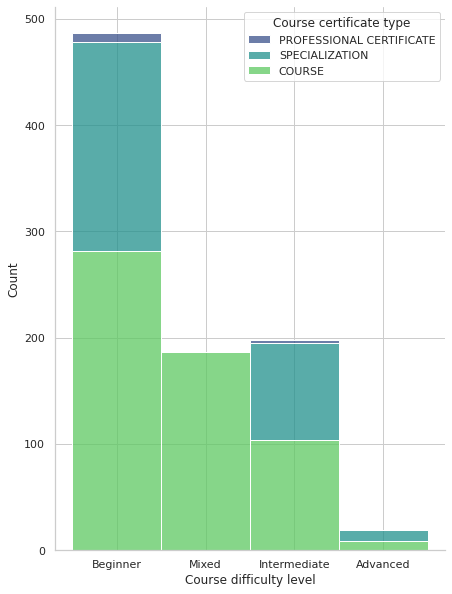

In [581]:
f, ax = plt.subplots(figsize=(7,10))
sns.despine() 

# add x-axis to plot
# add number values

sns.histplot(coursera_data, x="course_difficulty", hue="course_Certificate_type",multiple="stack", palette='viridis')
plt.xlabel('Course difficulty level')
ax.get_legend().set_title("Course certificate type")
plt.show()

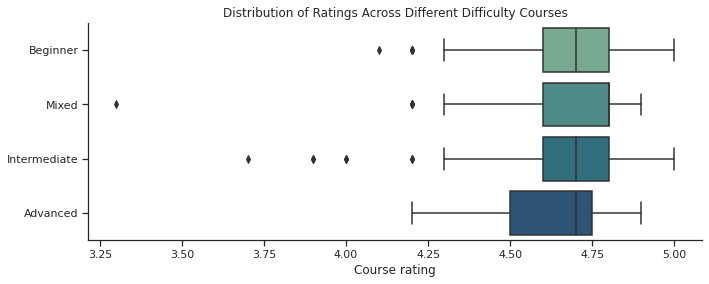

In [554]:
f, ax = plt.subplots(figsize=(11,4))
sns.despine() 
sns.set_theme(style='whitegrid')
ratings_boxplot = sns.boxplot(data=coursera_data[['course_difficulty', 'course_rating']], y='course_difficulty', x='course_rating', orient='h', palette='crest')
ratings_boxplot.set(title='Distribution of Ratings Across Different Difficulty Courses')
ax.set_xlabel('Course rating')
ax.set_ylabel('')
plt.show()

In [555]:
student_count = coursera_data.groupby('course_organization')['course_students_enrolled'].sum()

In [574]:
# most students enrolled
print(f'{student_count.idxmax()} has the maximum number of enrolled students totalling up to {student_count.max()}!')

University of Michigan has the maximum number of enrolled students totalling up to 7437700!


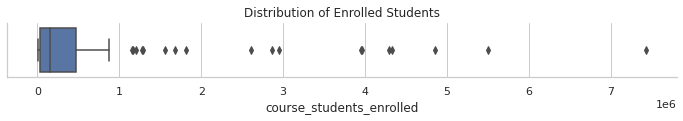

In [557]:
f, ax = plt.subplots(figsize=(12,1))
sns.despine() 
sns.boxplot(student_count).set(title='Distribution of Enrolled Students')
plt.show()

In [558]:
# filter which topics would interest a future data scientist
data_science_keywords = '|'.join(['Python', 'Machine Learning', 'ML', 'SQL', 'Data \
Science', 'Data Analysis', 'Artificial Intelligence', 'AI', 'Big Data', 'Data \
Visualization', 'Data Collection', 'Data Engineering', 'Data Mining', 'Deep \
Learning', 'MySQL', 'Neural Networks'])

data_science_courses = coursera_data[coursera_data['course_title'].str.contains(data_science_keywords)]

In [559]:
data_science_courses.shape

(111, 6)

In [560]:
data_science_courses['course_Certificate_type'].value_counts()

COURSE                      66
SPECIALIZATION              40
PROFESSIONAL CERTIFICATE     5
Name: course_Certificate_type, dtype: int64

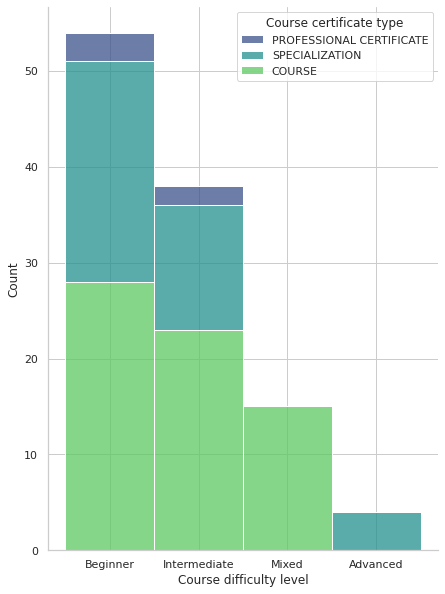

In [561]:
f, ax = plt.subplots(figsize=(7,10))
sns.despine() 

# add x-axis to plot
# add number values

sns.histplot(data_science_courses, x="course_difficulty", hue="course_Certificate_type",multiple="stack", palette='viridis')
plt.xlabel('Course difficulty level')
ax.get_legend().set_title("Course certificate type")
plt.show()

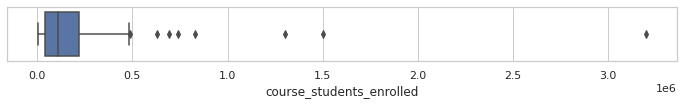

In [562]:
f, ax = plt.subplots(figsize=(12,1))
sns.boxplot(data_science_courses['course_students_enrolled'])
plt.show()

The graph indicates eight outliers ot of which one has more than 3 million students enrolled!

In [563]:
data_science_courses[data_science_courses['course_students_enrolled'] == data_science_courses['course_students_enrolled'].max()]

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
6,Machine Learning,Stanford University,COURSE,4.9,Mixed,3200000


It turns out this is the infamous Machine Learning course by Stanford University. The course has great reviews and is a topic of a lot of data science memes on the Internet.

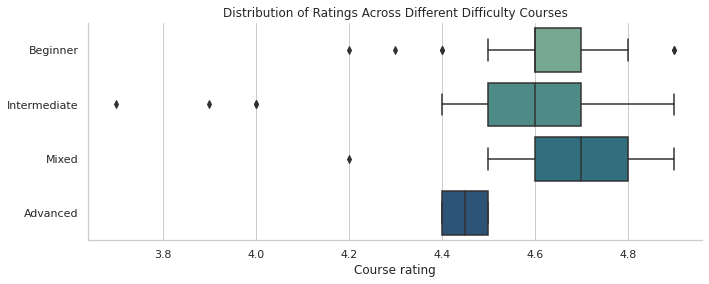

In [564]:
f, ax = plt.subplots(figsize=(11,4))
sns.despine() 
sns.set_theme(style='whitegrid')
ratings_boxplot = sns.boxplot(data=data_science_courses[['course_difficulty', 'course_rating']], y='course_difficulty', x='course_rating', orient='h', palette='crest')
ratings_boxplot.set(title='Distribution of Ratings Across Different Difficulty Courses')
ax.set_xlabel('Course rating')
ax.set_ylabel('')
plt.show()

One beginner course seems to stand out of the rest with an average rating of almost _5.0_. Could this be a worthwhile course for a beginner data science student?

In [573]:
beginner_courses = data_science_courses[data_science_courses['course_difficulty'] == 'Beginner']
beginner_courses[beginner_courses['course_rating'] == beginner_courses['course_rating'].max()]

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,field_of_study
123,Improving Deep Neural Networks: Hyperparameter...,deeplearning.ai,COURSE,4.9,Beginner,270000,data science
866,Introdução à Ciência da Computação com Python ...,Universidade de São Paulo,COURSE,4.9,Beginner,120000,data science


It turns out that this may not be a good option for a complete beginner who does not speak Portugese.

The Deep Neural Networks course is a part of the Deep Learning Specialization in Coursera and might be a good fit for someone who has some background in data exploration and Python programming but is just yet starting their journey into Deep Learning.

Interesting this is that this course is tought by the same lecturer Andrew Ng. 


In [565]:
# create a field of study label for data science courses
data_science_courses['field_of_study'] = 'data science'

# add field of study label to Coursera data and label the rest of the courses as
# 'other'
coursera_categories = coursera_data.merge(data_science_courses, how='outer').\
fillna('other')
coursera_categories.head(5)

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,field_of_study
0,IBM Data Science,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,480000,data science
1,Introduction to Data Science,IBM,SPECIALIZATION,4.6,Beginner,310000,data science
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2500000,other
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1500000,data science
4,Google IT Support,Google,PROFESSIONAL CERTIFICATE,4.8,Beginner,350000,other


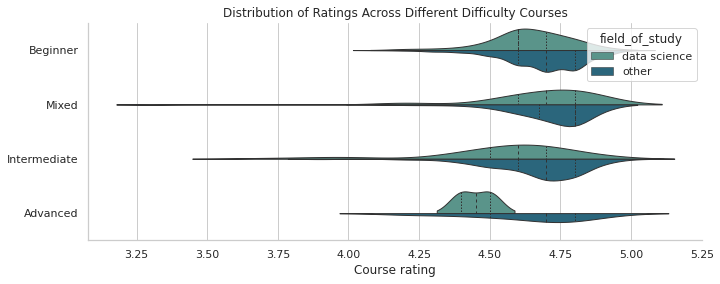

In [566]:
f, ax = plt.subplots(figsize=(11,4))
sns.despine() 
sns.set_theme(style='whitegrid')

ratings_boxplot = sns.violinplot(data=coursera_categories, y='course_\
difficulty', x='course_rating', orient='h', palette='crest', hue='field_of_\
study', split=True, inner="quart", linewidth=1)
ratings_boxplot.set(title='Distribution of Ratings Across Different Difficulty \
Courses')
ax.set_xlabel('Course rating')
ax.set_ylabel('')
plt.show()